In [292]:
# Load Libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,  AdaBoostRegressor, BaggingRegressor, StackingRegressor, VotingRegressor
from sklearn.model_selection import  cross_val_score, KFold,  GridSearchCV
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [293]:
#Load Training Data
file ='/home/ola/Documents/insulent/challenge/DataScienceMLTest_21/DataScience_MLTest/training.csv'
#Set index as date
data_train = pd.read_csv(file,parse_dates=['date'])
data_train.shape

(678, 19)

In [294]:
# Set index by date and sort it
data_train = data_train.sort_values(by='date',ascending=True)
data_train = data_train.set_index("date")
data_train

,image,image class,bar,baz,xgt,qgg,lux,wsg,yyz,drt,gox,foo,boz,fyt,lgh,hrt,juu,target
date,,,,,,,,,,,,,,,,,,
2016-03-01,training-img/dog/dog_50.jpg,dog,-0.125676,0,-120.310277,8.081390,6340.483433,0.008793,0.303609,-1320.744709,2.403756,33.532118,0.173805,0,0,81.894630,83.875081,-59103.644602
2016-03-02,training-img/person/person_17.jpg,person,1169.009109,1,101.049242,17.777242,7500.665167,0.007769,10.824538,-2183.043399,-17.389845,28.286081,0.500617,0,0,-183.829225,65.615380,106706.793795
2016-03-04,training-img/cartoon/cartoon_2.jpg,cartoon,0.199092,0,-115.413987,5.627181,5939.876688,0.008778,-5.953482,-22.046246,-2.161463,22.787279,0.245328,1,0,-92.336726,83.590049,-30562.548004
2016-03-07,training-img/dog/dog_13.jpg,dog,285.243307,1,-43.599535,13.999779,6356.146715,0.005561,-19.612725,-507.158006,-13.271726,23.352777,0.933765,0,0,-130.920248,33.749667,114078.796723
2016-03-07,training-img/dog/dog_27.jpg,dog,-86.461377,0,-74.597906,-9.813760,5376.881188,0.011387,22.311303,-3.580118,-11.976915,50.208067,0.460253,0,0,-385.304179,139.678549,112595.743428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-24,training-img/cake/cake_42.jpg,cake,1093.701390,0,222.123616,7.748889,5610.566157,0.011956,-2.737802,-0.663503,-2.267899,10.867625,0.720050,0,0,-155.924891,153.715559,-109733.061184
2019-02-24,training-img/flower/flower_48.jpg,flower,-21.391309,0,19.406944,-0.632102,7495.286229,0.017419,-0.461202,-4.810298,-0.612192,39.476790,0.437862,0,0,-441.424276,319.318688,211935.049671
2019-02-25,training-img/boat/boat_73.jpg,boat,115.656085,0,-280.192885,15.059633,5218.871438,0.012107,17.160476,-1685.581874,-14.104883,42.765812,0.626997,1,0,-72.664875,157.535841,80481.373807


In [295]:
#Columns Names
data_train.columns

Index(['image', 'image class', 'bar', 'baz', 'xgt', 'qgg', 'lux', 'wsg', 'yyz',
       'drt', 'gox', 'foo', 'boz', 'fyt', 'lgh', 'hrt', 'juu', 'target'],
      dtype='object')

In [296]:
# Remove image and image class columns
data_train.drop(['image', 'image class'], axis="columns", inplace=True)
print(f"Dimension df rows, columns: {data_train.shape}")

Dimension df rows, columns: (678, 16)


In [297]:
# Is date monotonic increasing ?-Yes
data_train.index.is_monotonic_increasing

True

In [298]:
# Find duplicated entries by date
duplicate_mask_series = data_train.index.duplicated(keep=False)
print(f" Duplicate dates {sum(duplicate_mask_series)}")

 Duplicate dates 322


In [299]:
# Find all occurrences of the duplicate dates
# Similar dates map to different target values thus date will not be considered
print(data_train.loc[duplicate_mask_series,'target'])


date
2016-03-07    114078.796723
2016-03-07    112595.743428
2016-03-20    -38562.853362
2016-03-20    126100.528933
2016-03-27     88107.030050
                  ...      
2019-02-24    252223.529261
2019-02-24   -109733.061184
2019-02-24    211935.049671
2019-02-25     80481.373807
2019-02-25    284676.072010
Name: target, Length: 322, dtype: float64


In [300]:
data_train[duplicate_mask_series].head(6)

,bar,baz,xgt,qgg,lux,wsg,yyz,drt,gox,foo,boz,fyt,lgh,hrt,juu,target
date,,,,,,,,,,,,,,,,
2016-03-07,285.243307,1,-43.599535,13.999779,6356.146715,0.005561,-19.612725,-507.158006,-13.271726,23.352777,0.933765,0,0,-130.920248,33.749667,114078.796723
2016-03-07,-86.461377,0,-74.597906,-9.813760,5376.881188,0.011387,22.311303,-3.580118,-11.976915,50.208067,0.460253,0,0,-385.304179,139.678549,112595.743428
2016-03-20,3.435444,0,-5.020161,4.015208,5476.989199,0.005718,7.073874,-91.730073,2.409919,27.030408,3.073021,0,0,-253.910750,35.677514,-38562.853362
2016-03-20,451.983142,0,174.338815,10.095626,6640.632763,0.004286,18.094218,-606.445127,17.733978,25.465547,0.185603,0,0,-378.051879,20.082792,126100.528933
2016-03-27,18.285545,1,-88.380955,-20.650705,4789.680468,0.018776,-9.474876,-355.242395,15.328967,26.345072,4.766160,0,0,-369.475326,368.567752,88107.030050
2016-03-27,-59.546573,0,68.706132,-10.600132,5220.891989,0.005338,-18.027019,-219.768934,17.006029,20.674839,1.087813,0,0,-73.830448,31.114613,104865.414656


<Axes: xlabel='date'>

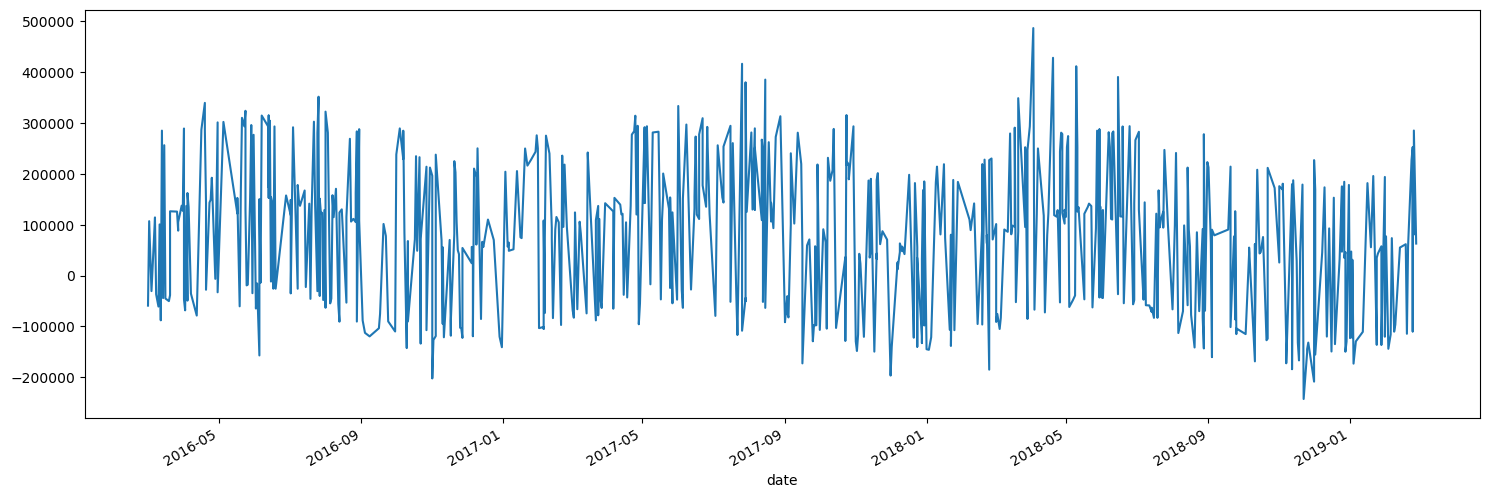

In [361]:
# Plotting the time series of given dataframe
plt.figure(figsize=(18, 6))
data_train.target.plot(kind = "line")

In [302]:
# Correlatio with target variable, there is no clear linear relationship with the target variable
corr_y = data_train.corr('pearson')['target']
corr_y

bar       0.058495
baz       0.008524
xgt       0.059559
qgg      -0.015258
lux       0.033065
wsg      -0.000386
yyz      -0.014862
drt       0.001962
gox      -0.011707
foo      -0.011086
boz       0.033299
fyt      -0.011562
lgh      -0.039907
hrt      -0.036169
juu      -0.005196
target    1.000000
Name: target, dtype: float64

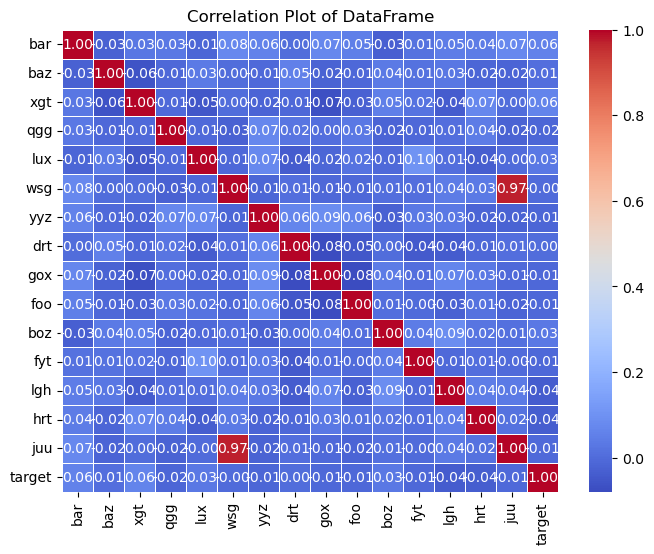

In [303]:
# Search for multicolinearity within the features
corr_matrix = data_train.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Plot of DataFrame')
plt.show()

     


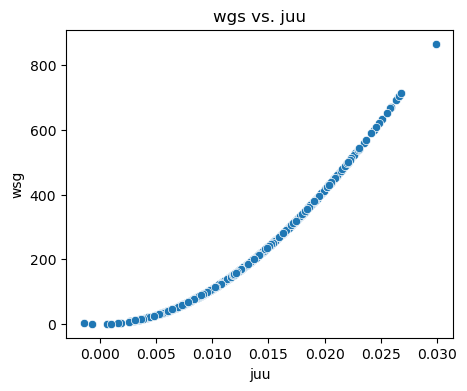

In [304]:
# Plot Variables with high correlation
plt.figure(figsize=(5, 4))
sns.scatterplot(x='wsg', y='juu', data=data_train)
plt.ylabel('wsg')
plt.xlabel('juu')
plt.title('wgs vs. juu')
plt.show()

In [305]:
# Remove redundant variable with high correlation
data_train.drop('juu', axis=1, inplace= True)

In [306]:
# Preprape Train Data
y_train = data_train['target']  # Target variable
X_train = data_train.drop('target', axis=1)

In [307]:
y_train.head(5)

date
2016-03-01    -59103.644602
2016-03-02    106706.793795
2016-03-04    -30562.548004
2016-03-07    114078.796723
2016-03-07    112595.743428
Name: target, dtype: float64

In [308]:
X_train.head(5)

,bar,baz,xgt,qgg,lux,wsg,yyz,drt,gox,foo,boz,fyt,lgh,hrt
date,,,,,,,,,,,,,,
2016-03-01,-0.125676,0,-120.310277,8.081390,6340.483433,0.008793,0.303609,-1320.744709,2.403756,33.532118,0.173805,0,0,81.894630
2016-03-02,1169.009109,1,101.049242,17.777242,7500.665167,0.007769,10.824538,-2183.043399,-17.389845,28.286081,0.500617,0,0,-183.829225
2016-03-04,0.199092,0,-115.413987,5.627181,5939.876688,0.008778,-5.953482,-22.046246,-2.161463,22.787279,0.245328,1,0,-92.336726
2016-03-07,285.243307,1,-43.599535,13.999779,6356.146715,0.005561,-19.612725,-507.158006,-13.271726,23.352777,0.933765,0,0,-130.920248
2016-03-07,-86.461377,0,-74.597906,-9.813760,5376.881188,0.011387,22.311303,-3.580118,-11.976915,50.208067,0.460253,0,0,-385.304179


In [319]:
#Standarize Features in X due to the differences in their magnitudes
X_train_estandard = X_train.copy()
columnnames = X_train.columns
scaler = StandardScaler()
X_train_estandard [columnnames] = scaler.fit_transform(X_train[columnnames])

In [321]:
X_train_estandard.head(5)

,bar,baz,xgt,qgg,lux,wsg,yyz,drt,gox,foo,boz,fyt,lgh,hrt
date,,,,,,,,,,,,,,
2016-03-01,-0.598945,-0.968061,-1.056392,0.734770,0.388716,-0.953205,0.084645,-0.013010,0.229646,0.456244,-0.355338,-0.945439,-0.733086,1.967350
2016-03-02,1.968673,1.032992,0.052401,1.647389,1.615824,-1.160003,1.112970,-0.090648,-1.709872,0.043962,-0.313258,-0.945439,-0.733086,0.396015
2016-03-04,-0.598232,-0.968061,-1.031866,0.503768,-0.035000,-0.956255,-0.526928,0.103920,-0.217687,-0.388185,-0.346129,1.057710,-0.733086,0.937048
2016-03-07,0.027774,1.032992,-0.672147,1.291836,0.405283,-1.605634,-1.861995,0.060243,-1.306349,-0.343743,-0.257487,-0.945439,-0.733086,0.708888
2016-03-07,-0.788553,-0.968061,-0.827418,-0.949605,-0.630473,-0.429677,2.235696,0.105583,-1.179474,1.766795,-0.318455,-0.945439,-0.733086,-0.795389


Cross-Validation RMSE Results:
Linear Regression: CV Mean RMSE = 143870.9391, CV Std RMSE = 3954.7106
Random Forest Regressor: CV Mean RMSE = 47247.7875, CV Std RMSE = 1352.7514
Gradient Boosting Regressor: CV Mean RMSE = 53105.8185, CV Std RMSE = 3164.4196
Adaboosting Regressor: CV Mean RMSE = 53982.8233, CV Std RMSE = 2789.4642
Bagging Regressor: CV Mean RMSE = 50210.5074, CV Std RMSE = 2569.5762

The model with the lowest average RMSE during cross-validation is: Random Forest Regressor
CV Mean RMSE: 47247.7875, CV Standard Deviation: 1352.7514


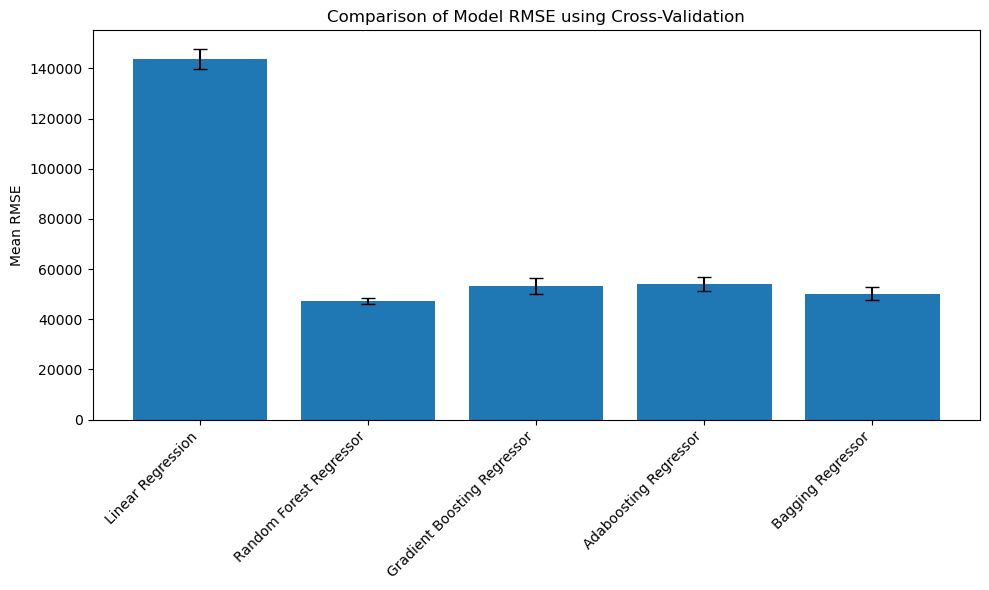

In [322]:
# Define the models to compare
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
    'Adaboosting Regressor': AdaBoostRegressor(random_state=42),
    'Bagging Regressor': BaggingRegressor(random_state=42),
}

# Perform Five Folds cross-validation for each model
results = {}
for name, model in models.items():
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    # Use negative mean squared error as scoring, as cross_val_score maximizes the score
    neg_mse_scores = cross_val_score(model, X_train_estandard, y_train, cv=kf, scoring='neg_mean_squared_error')
    # Convert negative MSE to positive RMSE
    rmse_scores = np.sqrt(-neg_mse_scores)
    results[name] = {'rmse_mean': rmse_scores.mean(), 'rmse_std': rmse_scores.std(), 'rmse_scores': rmse_scores}

# Identify the model with the lowest mean RMSE
best_model_name = min(results, key=lambda k: results[k]['rmse_mean'])
best_model_results = results[best_model_name]

print("Cross-Validation RMSE Results:")
for name, res in results.items():
    print(f"{name}: CV Mean RMSE = {res['rmse_mean']:.4f}, CV Std RMSE = {res['rmse_std']:.4f}")

print(f"\nThe model with the lowest average RMSE during cross-validation is: {best_model_name}")
print(f"CV Mean RMSE: {best_model_results['rmse_mean']:.4f}, CV Standard Deviation: {best_model_results['rmse_std']:.4f}")


# Visualize the results
plt.figure(figsize=(10, 6))
model_names = list(results.keys())
mean_rmse_scores = [res['rmse_mean'] for res in results.values()]
std_rmse_scores = [res['rmse_std'] for res in results.values()]

plt.bar(model_names, mean_rmse_scores, yerr=std_rmse_scores, capsize=5)
plt.ylabel('Mean RMSE')
plt.title('Comparison of Model RMSE using Cross-Validation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [336]:
# Get the best model and trai it on the entire training set
best_model = models[best_model_name]
best_model.fit(X_train_estandard, y_train)

# Evaluate the best model on the train set
y_pred_bestmodel = best_model.predict(X_train_estandard)
training_rmse_best = np.sqrt(mean_squared_error(y_train, y_pred_bestmodel))
errors_bestmodel = y_train - y_pred_bestmodel
print(f"\nRMSE of the best model with CV ({best_model_name}) on the whole training set: {training_rmse_best:.4f}")


RMSE of the best model with CV (Random Forest Regressor) on the whole training set: 17648.4004


In [337]:
print(best_model.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


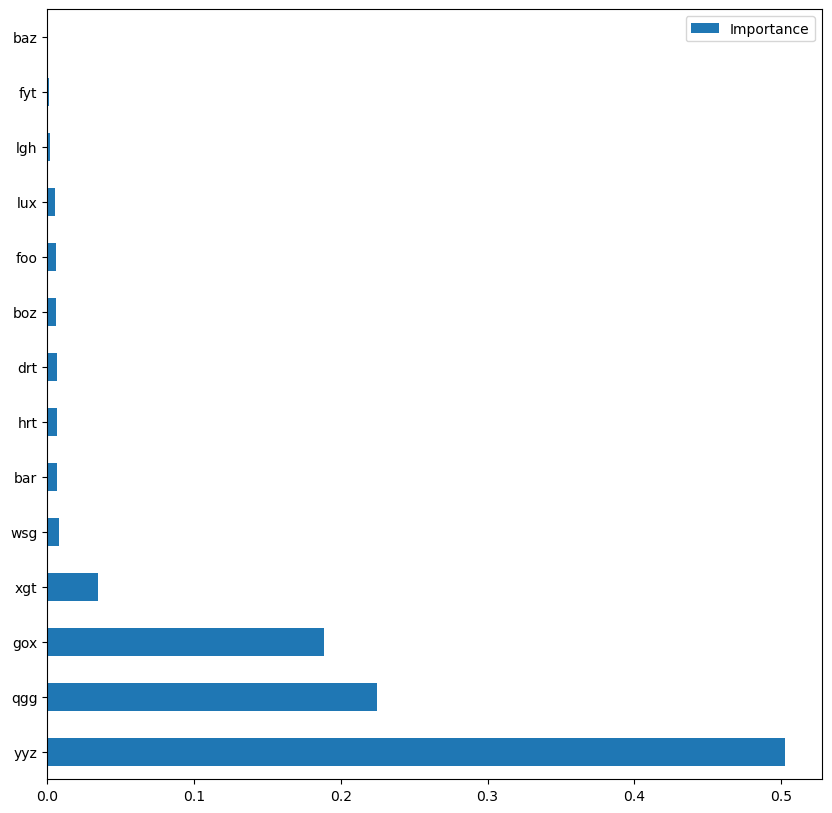

In [314]:
# Feature Importance in Random Forest
sorted_indices = np.argsort(best_model.feature_importances_)[::-1]
sorted_features = X_train.columns.values[sorted_indices]
sorted_importances = best_model.feature_importances_[sorted_indices]
sorted_importances_df = pd.DataFrame(sorted_importances, index=sorted_features, columns=['Importance'])
sorted_importances_df.plot(kind='barh', figsize=(10, 10))
plt.show()

In [342]:
# Voting Ensamble, attempt to improve model prediction

# Initialize individual classifiers
reg1= RandomForestRegressor(random_state=42)
reg2= GradientBoostingRegressor(random_state=42)
reg3= AdaBoostRegressor(random_state=42)
reg4= BaggingRegressor(random_state=42)

# Create the VotingRegressor
# The final prediction is the average of the predictions of the individual regressors.
ensemblereg = VotingRegressor(estimators=[('rf', reg1), ('gbr', reg2), ('adar', reg3),('bagr', reg4)])
ensemblereg= ensemblereg.fit(X_train_estandard, y_train)
y_pred_ensemble = ensemblereg.predict(X_train_estandard)
rmse_ensemble = np.sqrt(mean_squared_error(y_train, y_pred_ensemble))
errors_ensemble = y_train - y_pred_ensemble
print(f"RMSE of Voting Regressor, on the training set: {rmse_ensemble :.4f}")


RMSE of Voting Regressor, on the training set: 27056.0684


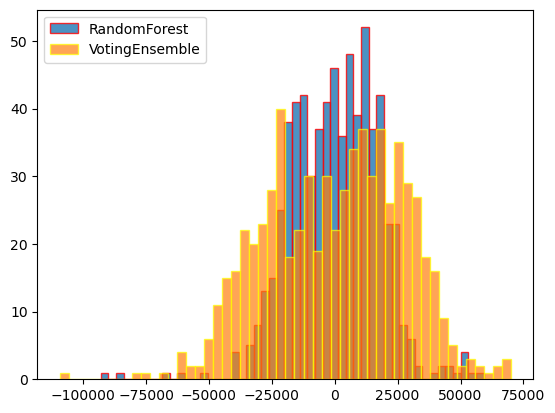

In [351]:
# Ploting Erros across Models
plt.hist(errors_bestmodel, label='RandomForest', alpha=.8, edgecolor='red', bins=50)
plt.hist(errors_ensemble, label='VotingEnsemble', alpha=0.7, edgecolor='yellow', bins=50)
plt.legend()
plt.show()

# Load Testing Data

In [353]:
#Load Training Data
file_test ='/home/ola/Documents/insulent/challenge/DataScienceMLTest_21/DataScience_MLTest/test.csv'
#Set index as date
data_test = pd.read_csv(file_test,parse_dates=['date'])

In [354]:
# Set index by date and sort it
data_test = data_test.sort_values(by='date',ascending=True)
data_test = data_test.set_index("date")
data_test.head(5)

,image,bar,baz,xgt,qgg,lux,wsg,yyz,drt,gox,foo,boz,fyt,lgh,hrt,juu
date,,,,,,,,,,,,,,,,
2018-03-13,test-img/galaxy/galaxy_10.jpg,0.010168,1,-321.918234,0.745860,6079.131413,0.011153,0.647039,-130.810723,0.215793,0.427012,0.793635,0,0,-288.148805,134.087266
2018-03-21,test-img/galaxy/galaxy_9.jpg,947.013623,1,35.152583,12.220003,6313.115212,0.007829,8.096062,-53.528171,-23.115159,6.639362,0.094435,1,0,-123.788301,66.629577
2018-05-15,test-img/cake/cake_41.jpg,343.647336,0,-120.823528,-2.324844,5224.352287,0.012493,1.766884,-5451.683971,-7.895307,23.945848,0.185305,1,0,-222.551460,167.537397
2018-05-15,test-img/galaxy/galaxy_2.jpg,249.292705,1,184.279333,2.966202,5467.118682,0.013806,5.082280,-135.525215,6.046241,18.477131,13.406953,0,1,-440.054080,203.662536
2018-05-20,test-img/ball/ball_8.jpg,276.492816,0,-363.400163,7.545298,5536.456346,0.010306,-1.928627,-47.127370,-3.679753,18.266090,1.062210,1,0,-358.509594,114.761972


In [355]:
# Prepare testing set
X_test = data_test[X_train.columns]
X_test.head(5)

,bar,baz,xgt,qgg,lux,wsg,yyz,drt,gox,foo,boz,fyt,lgh,hrt
date,,,,,,,,,,,,,,
2018-03-13,0.010168,1,-321.918234,0.745860,6079.131413,0.011153,0.647039,-130.810723,0.215793,0.427012,0.793635,0,0,-288.148805
2018-03-21,947.013623,1,35.152583,12.220003,6313.115212,0.007829,8.096062,-53.528171,-23.115159,6.639362,0.094435,1,0,-123.788301
2018-05-15,343.647336,0,-120.823528,-2.324844,5224.352287,0.012493,1.766884,-5451.683971,-7.895307,23.945848,0.185305,1,0,-222.551460
2018-05-15,249.292705,1,184.279333,2.966202,5467.118682,0.013806,5.082280,-135.525215,6.046241,18.477131,13.406953,0,1,-440.054080
2018-05-20,276.492816,0,-363.400163,7.545298,5536.456346,0.010306,-1.928627,-47.127370,-3.679753,18.266090,1.062210,1,0,-358.509594


In [356]:
#Standarize Data
X_test_estandard = X_test.copy()
columnnames = X_test.columns
scaler = StandardScaler()
X_test_estandard [columnnames] = scaler.fit_transform(X_test[columnnames])
X_test_estandard.head(5)

,bar,baz,xgt,qgg,lux,wsg,yyz,drt,gox,foo,boz,fyt,lgh,hrt
date,,,,,,,,,,,,,,
2018-03-13,-0.582054,0.936586,-1.969400,-0.028798,0.366090,-0.326583,0.006028,0.219418,0.135334,-1.931757,-0.222560,-0.990697,-0.653197,-0.159466
2018-03-21,1.636323,0.936586,-0.254998,1.069890,0.633433,-1.024534,0.767403,0.254886,-2.050843,-1.481522,-0.266809,1.009390,-0.653197,0.857780
2018-05-15,0.222924,-1.067708,-1.003885,-0.322828,-0.610553,-0.045180,0.120489,-2.222492,-0.624699,-0.227249,-0.261058,1.009390,-0.653197,0.246524
2018-05-15,0.001896,0.936586,0.461004,0.183807,-0.333176,0.230531,0.459360,0.217255,0.681664,-0.623590,0.575681,-0.990697,1.530931,-1.099625
2018-05-20,0.065613,-1.067708,-2.168567,0.622271,-0.253953,-0.504531,-0.257235,0.257823,-0.229690,-0.638885,-0.205563,1.009390,-0.653197,-0.594937


In [357]:
# Evaluate the best model on the test set
y_pred_rf_model = best_model.predict(X_test_estandard)
X_test_estandard["target_pred_test"] = y_pred_rf_model

<Axes: xlabel='date'>

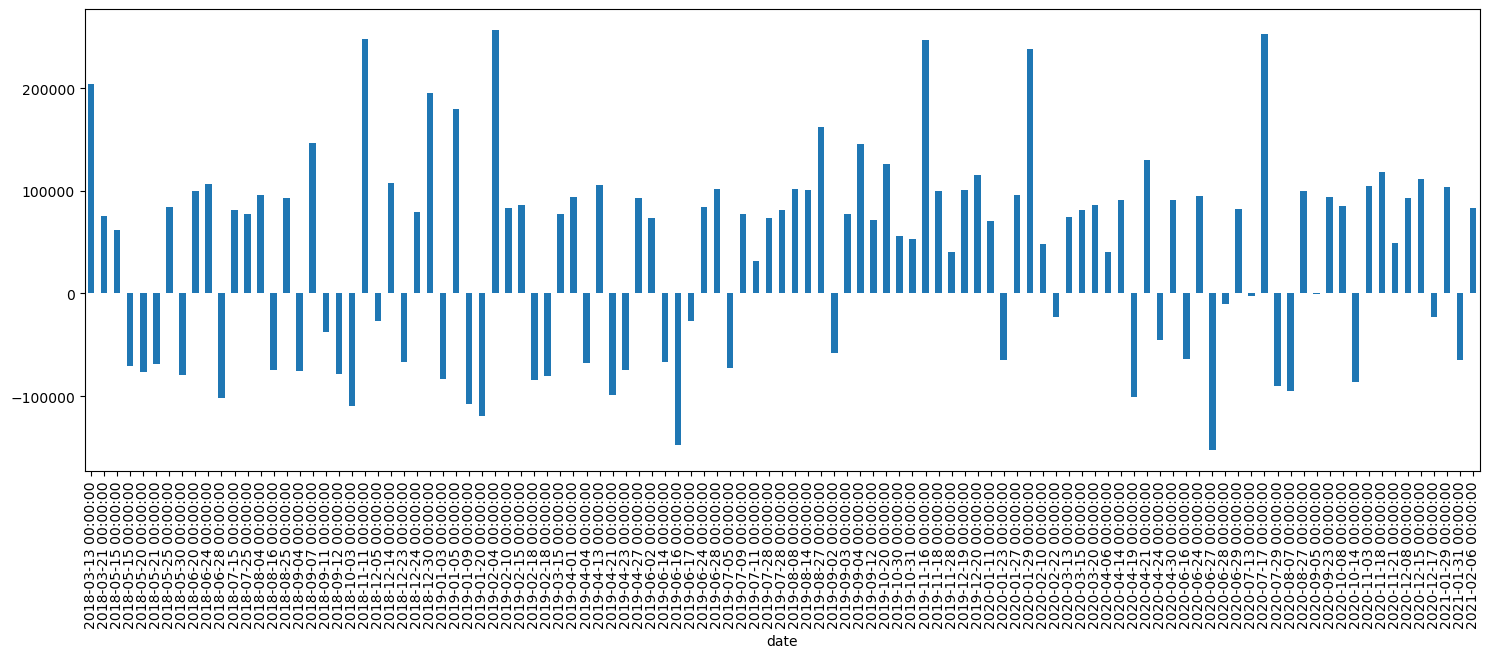

In [359]:
# Plotting the time series of given dataframe
plt.figure(figsize=(18, 6))
X_test_estandard.target_pred_test.plot(kind = "bar")